# ML Assignment

In [2]:
# import functions

import numpy as np
import pandas as pd

import gzip

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

# Task (1) c) General Knowledge

In [3]:
# creating confusion matrix
table_1 = pd.DataFrame({"":['Predicted Positive','Predicted Negative'],
                        "Positive":[70, 6],"Negative":[10, 200]})
table_1 = table_1.set_index("")

TP_1 = table_1.iloc[0,0]
TN_1 = table_1.iloc[1,1]
FP_1 = table_1.iloc[0,1]
FN_1 = table_1.iloc[1,0]

display(table_1)

print("Null Error Rate: " + str((FP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1)))
print("Missclassification rate: " + str((FP_1+FN_1)/
                                        (TP_1+TN_1+FP_1+FN_1)))
print("TPR = " + str(TP_1/(TP_1+FN_1)))
print("FPR = " + str(FP_1/(FP_1+TN_1)))

,Positive,Negative
,,
Predicted Positive,70,10
Predicted Negative,6,200


Null Error Rate: 0.7342657342657343
Missclassification rate: 0.055944055944055944
TPR = 0.9210526315789473
FPR = 0.047619047619047616


# Task (2) a) Unsupervised Learning

In [4]:
# loading the dataset via keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# checking the dimensions of the data
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


The label of the phand-written number is 5


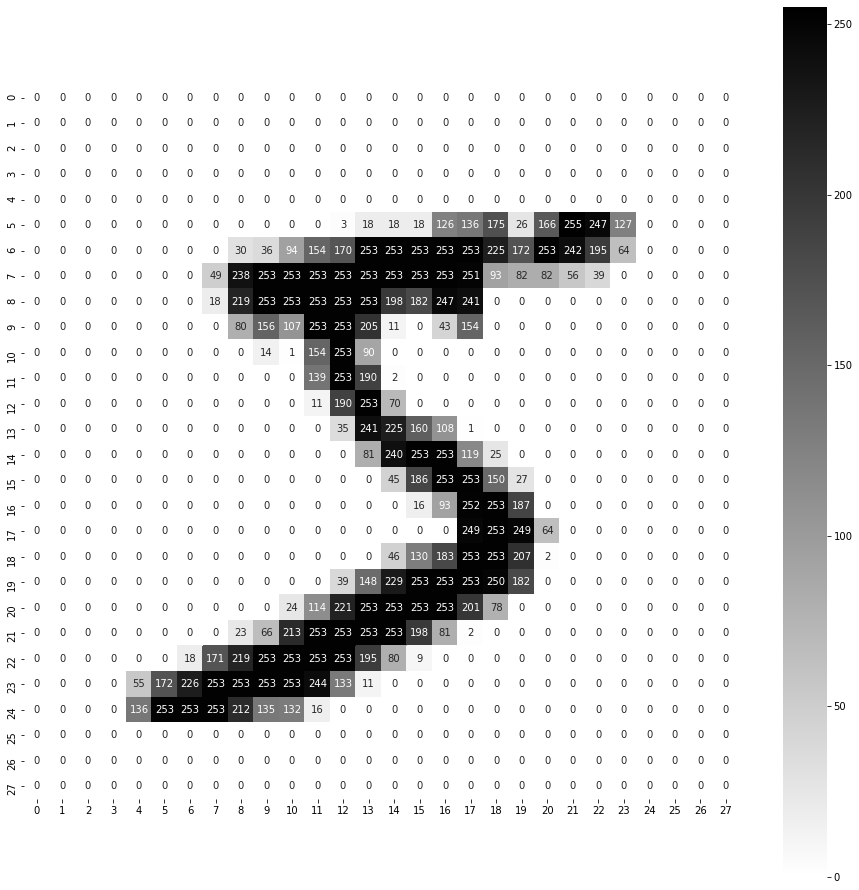

In [5]:
# index number of an instance
i = 0

image = x_train[i]
label = y_train[i]

print(f"The label of the phand-written number is {label}")

color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, annot=True, fmt='.0f', square=True, cmap=reversed_color_map)
plt.show()

In [6]:
# flattening the 3D components data into 2D dataframe
x_train_data_to_append = {}
for i in range(len(x_train)):
    temp_img = x_train[i]
    temp_img = x_train[i].flatten()
    x_train_data_to_append[i] = temp_img
x_train_df = pd.DataFrame.from_dict(x_train_data_to_append)
x_train_df = x_train_df.T

x_test_data_to_append = {}
for i in range(len(x_test)):
    temp_img = x_test[i]
    temp_img = x_test[i].flatten()
    x_test_data_to_append[i] = temp_img
x_test_df = pd.DataFrame.from_dict(x_test_data_to_append)
x_test_df = x_test_df.T

# normalising the test data
normalised_features = normalize(x_train_df)
normalised_features_test = normalize(x_test_df)

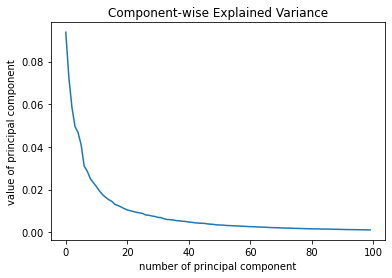

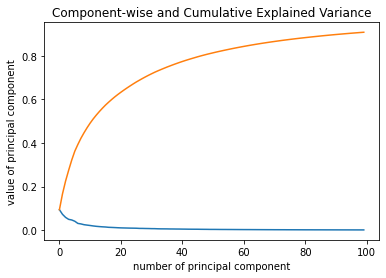

In [39]:
# running PCA
pca_100 = PCA(n_components = 100)
pca_100.fit(normalised_features)

# reducing dimensionality of the training data
normalised_features_100 = pca_100.fit(normalised_features).transform(normalised_features)

# plotting component-wise variance explained 
plt.plot(pca_100.explained_variance_ratio_)
plt.title("Component-wise Explained Variance")
plt.xlabel('number of principal component')
plt.ylabel('value of principal component')
plt.show()

# plotting component-wise and cumulative variance explaine
plt.plot(pca_100.explained_variance_ratio_)
plt.plot(np.cumsum(pca_100.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of principal component')
plt.ylabel('value of principal component')
plt.show()

After having added about 20 principal components, the data can explain roughly 60% of the variance, and each additional principal component adds only about 1% of variance.

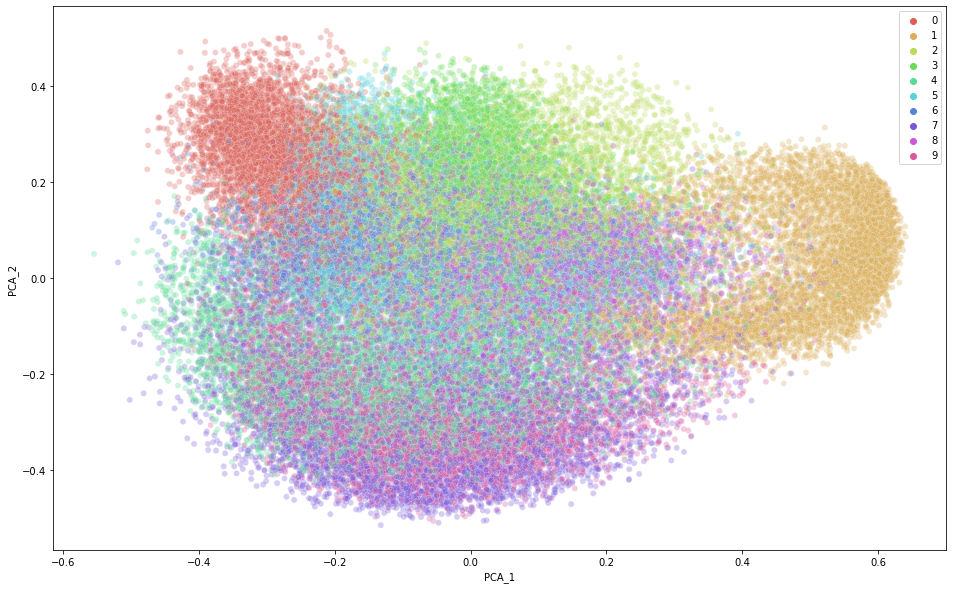

In [36]:
# reducing data into 2-dimensional latent space using PCA
pca2 = PCA(n_components =2)
pca2.fit(normalised_features)

# reducing dimensionality of the training data
X_transformed_2 = pca2.transform(normalised_features)

# plotting dimensionality reduced data using outcome values to depict potential clusters
plt.figure(figsize=(16,10))
sns.scatterplot(x=X_transformed_2[:,0], y=X_transformed_2[:,1],hue=y_train,
    palette=sns.color_palette("hls", 10),legend="full",alpha=0.3)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

Even after adding only two principal components, some clusters are already visible.

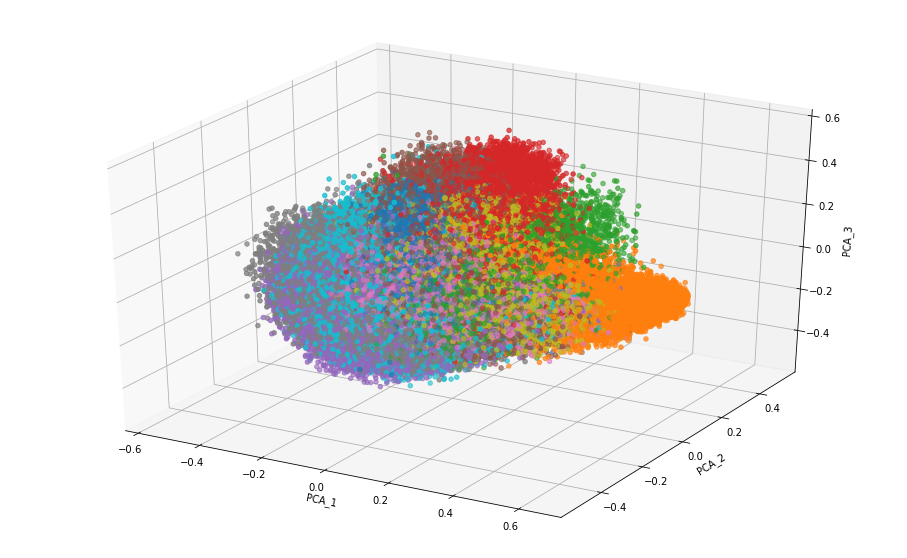

In [9]:
# code snippets drawn from:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# reducing data into 3-dimensional latent space using PCA
pca3 = PCA(n_components =3)
pca3.fit(normalised_features)

# reducing dimensionality of the training data
X_transformed_3 = pca3.transform(normalised_features) # project it down into n_components

# plotting dimensionality reduced data using outcome values to depict potential clusters
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=X_transformed_3[:,0], ys=X_transformed_3[:,1], 
    zs=X_transformed_3[:,2], c=y_train, cmap='tab10')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
plt.show()

# (3) b)

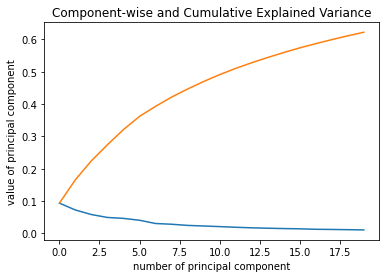

Explained cumulative variance ratio: 0.6219717631710423


In [38]:
# reducing dimensions of MNIST dataset into 20-dimensional laten space to run more efficiently
n_components = 20
pca_svc = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(normalised_features)

x_train_pca = pca_svc.transform(normalised_features)
x_test_pca = pca_svc.transform(normalised_features_test)

plt.plot(pca_svc.explained_variance_ratio_)
plt.plot(np.cumsum(pca_svc.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of principal component')
plt.ylabel('value of principal component')
plt.show()

print(f"Explained cumulative variance ratio: {pca_svc.explained_variance_ratio_.sum()}")

After having added about 20 principal components, the data can explain 60%+ of the variance, and each additional principal component adds only about 1% of variance. Thus, it would be sensible to transform the MNIST dataset into a 20-dimensional latent space using PCA.

In [11]:
# defining hyperparameters for SVC
costs = [0.001,
         0.01,
         0.1,
         int(1e0),
         int(1e1),
         int(1e2),
         int(1e3),
         int(1e4),
         int(1e5),
         int(1e6)]
scores = list()

# running SVC results on dimensionality reduced MNIST dataset and cross-validating
for c in costs:
    print(c)
    model_SVC_2 = SVC(C=c, kernel='linear', max_iter=100000)
    model_SVC_2.fit(x_train_pca,y_train)
    scores.append(model_SVC_2.score(x_test_pca,y_test))

0.001
0.01
0.1
1
10


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


100


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


1000


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


10000


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


100000


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


1000000


/Users/mads/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


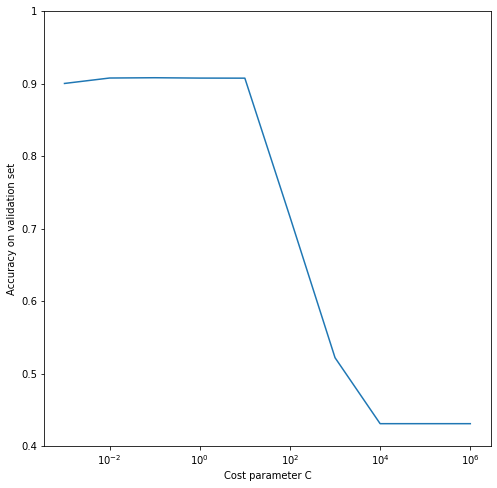

In [12]:
# plot outcome of cross-validation
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Accuracy on validation set')
plt.xlabel('Cost parameter C')
plt.xscale('log')
plt.show()

Highest accuracy achieved with cost parameter around C=0.1.

In [13]:
# running SVC with optimal cost parameter
model2 = SVC(C=0.01, kernel='linear', max_iter=100000, probability=True)
model2.fit(x_train_pca,y_train)
print(f"Accuracy on test set: {model2.score(x_test_pca,y_test)}")

Accuracy on test set: 0.9077


In [14]:
# reducing size of training data set to make computation feasible
x_train_pca_short = x_train_pca[:10000]
y_train_short = y_train[:10000]

In [15]:
# defining SVM with exponential kernel
def svm_rbf_tuned_eval(C, logGamma):
    model = SVC(C=C, kernel = 'rbf', gamma=10**logGamma, max_iter=100000).fit(x_train_pca_short, y_train_short)
    accuracy = model.score(x_test_pca,y_test)
    return accuracy

costs = [0.01,0.1,1,10,100,1000]
logGamma = [-4,-3,-2,-1,0] 

scores = np.zeros(len(costs))
gamma = np.zeros(len(costs))

# running SVM with exponential kernel on range of hyperparameters
for ii in range(0,len(costs)):
    best_accuracy = 0.0
    for g in logGamma:
        accuracy = svm_rbf_tuned_eval(costs[ii], g)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            scores[ii] = accuracy
            gamma[ii] = g

print(f"Shortened explonential model with highest accuracy (accuracy = {scores[np.argmax(scores)]}) has C = {costs[np.argmax(scores)]}  and gamma = {gamma[np.argmax(scores)]}")

Shortened explonential model with highest accuracy (accuracy = 0.9659) has C = 10  and gamma = -1.0


In [16]:
# reporting on best exponential model, its performance and hyperparameters
model_rbf_best = SVC(C=10, kernel = 'rbf', gamma=10**-1, max_iter=100000).fit(x_train_pca, y_train)
accuracy_rbf_best = model_rbf_best.score(x_test_pca,y_test)

print(f"Explonential model with highest accuracy (accuracy = {accuracy_rbf_best}) has C = 10  and gamma = -1")

Explonential model with highest accuracy (accuracy = 0.9811) has C = 10  and gamma = -1


In [17]:
# defining SVM with polynomial kernel
def svm_poly_tuned_eval(C, degree):
    model_poly = SVC(C=C, kernel = 'poly', degree=degree, max_iter=100000).fit(x_train_pca_short, y_train_short)
    accuracy = model_poly.score(x_test_pca,y_test)
    return accuracy

costs = [0.01,0.1,1,10,100,1000]
degree = [2,3,4,5,6] 

scores = np.zeros(len(costs))
degrees = np.zeros(len(costs))

# running SVM with polynomial kernel on range of hyperparameters
for ii in range(0,len(costs)):
    best_accuracy = 0.0
    for d in degree:
        accuracy = svm_poly_tuned_eval(costs[ii], d)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            scores[ii] = accuracy
            degrees[ii] = d

print(f"Shortened quadratic model with highest accuracy (accuracy = {scores[np.argmax(scores)]}) has C = {costs[np.argmax(scores)]} and degree = {degrees[np.argmax(scores)]}")

Shortened quadratic model with highest accuracy (accuracy = 0.9572) has C = 1 and degree = 3.0


In [18]:
# reporting on best polynomial model, its performance and hyperparameters
model_poly_best = SVC(C=1, kernel = 'poly', degree=3, max_iter=100000).fit(x_train_pca, y_train)
accuracy_poly_best = model_poly_best.score(x_test_pca,y_test)

print(f"Quadratic model with highest accuracy (accuracy = {accuracy_poly_best}) has C = 1  and degree = 3")

Quadratic model with highest accuracy (accuracy = 0.9747) has C = 1  and degree = 3


# (4) b)

In [19]:
# code snippets drawn from:
# https://hackernoon.com/building-a-feedforward-neural-network-from-scratch-in-python-d3526457156b
# https://colab.research.google.com/github/chokkan/deeplearningclass/blob/master/mnist.ipynb#scrollTo=mZtrUqeSROVa

# defining the sigmoid activation function
def sig(x):
    return 1.0/(1.0 + np.exp(-x))
    
# defining the derivative of the sigmoid activation function
def sig_derivative(x):
    return x*(1-x)
  
# defining the softmax function, to represent results as a probabilit
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

# defining a label-to-onehod encoder (i.e., #0 -> 1 0 0 0 0 0 0 0 0 0, #9 -> 0 0 0 0 0 0 0 0 0 1)
def lto(y):
    enc = OneHotEncoder()
    y_oh = enc.fit_transform(np.expand_dims(y,1)).toarray()
    return y_oh

# building 2-layer feedforward neural network
class NeuralNetwork_MultiClass:
    def __init__(self, n_inputs, n_outputs, learning_rate, hidden_sizes=[3]):
        self.input = n_inputs # input dimension
        self.output = n_outputs # output dimension
        self.lr = learning_rate # learning rate
        self.hiddensizes = len(hidden_sizes) # hidden layer dimension
        self.sizes = [self.input] + hidden_sizes + [self.output]
        self.ylosses = [] # error rate
        self.activation = sig # activation function
        self.d_activation = sig_derivative # derivative of activation function
        self.act_in = {} # weighted sum of inputs
        self.act_out = {} # activation_function(weighted sum of inputs)
        self.weight = {} # weights
        self.bias = {} # bias
        
        # creating random weights and bias
        for i in range(self.hiddensizes+1):
            self.weight[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.bias[i+1] = np.zeros((1, self.sizes[i+1])) 
        
        # derivative values of the above weighted sum of inputs, 
        # activation_function(weighted sum of inputs), weights and bias
        self.dact_in = {}
        self.dact_out = {}
        self.dweight = {}
        self.dbias = {}
            
    # calculating probabilities of inputs representing labels
    def feedforward(self, x):
        self.act_out[0] = x.reshape(1, -1) # inputting and reshaping raw data
        for i in range(self.hiddensizes): # feeding raw input data to all hidden layers and applying activation function
            self.act_in[i+1] = np.matmul(self.act_out[i], self.weight[i+1]) + self.bias[i+1] # calculating weighted sum of input data
            self.act_out[i+1] = self.activation(self.act_in[i+1]) # applying activation function to hidden layer
        self.act_in[self.hiddensizes+1] = np.matmul(self.act_out[self.hiddensizes],
                                                    self.weight[self.hiddensizes+1]) + self.bias[self.hiddensizes+1] # calculating weighted sum of hidden layer output data
        self.act_out[self.hiddensizes+1] = softmax(self.act_in[self.hiddensizes+1]) # applying softmax to hidden layer output
        return self.act_out[self.hiddensizes+1] # returning label predictions

    def backprop(self, x, y):
        self.feedforward(x) # calculating label predictions
        L = self.hiddensizes + 1 
        self.dact_in[L] = (self.act_out[L] - y) # calculating errors
        for k in range(L, 0, -1):
            self.dweight[k] = np.matmul(self.act_out[k-1].T, self.dact_in[k]) # calculating derivatives of weights
            self.dbias[k] = self.dact_in[k] # calculating derivatives of bias
            self.dact_out[k-1] = np.matmul(self.dact_in[k], self.weight[k].T) # calculating derivatives of activation_function
            self.dact_in[k-1] = np.multiply(self.dact_out[k-1], 
                                            self.d_activation(self.act_out[k-1])) # calculating derivative of weighted sum of inputs

    # applying the 2-layer feedforward neural network
    def fit(self, X, Y, epochs=100):
        for epoch in tqdm(range(epochs), total=epochs, unit="epoch"): # iterating learning process over number of epochs defines
            dweight = {} # initializing derivative of weights history
            dbias = {} # initializing derivative of bias history
            for i in range(self.hiddensizes+1): # initializing size of dweight and dbias dictionaries
                dweight[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dbias[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y): # running the feedforward and backpropagation algorithms
                self.backprop(x, y)
                for i in range(self.hiddensizes+1): # updating dweight and dbias history
                    dweight[i+1] += self.dweight[i+1]
                    dbias[i+1] += self.dbias[i+1]
            m = X.shape[1]
            for i in range(self.hiddensizes+1): # updating weights and bias values according to learning rate
                self.weight[i+1] -= self.lr * (dweight[i+1]/m)
                self.bias[i+1] -= self.lr * (dbias[i+1]/m)
            Y_pred = self.predict(X) # predicting labels
            loss = self.cross_entropy(Y, Y_pred) # recording losses
            self.ylosses.append(loss) # appending losses to loss list
    
    # calculating cross-entropy, i.e., the error rate
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
    
    # predicting labels
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.feedforward(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

In [27]:
# one-hot-encoding labels
y_lto_train = lto(y_train)
y_lto_train_short = lto(y_train_short)
y_lto_test = lto(y_test)

In [40]:
# training the network on dimensionality reduced input data with multi-class prediction, learning rate of 0.05 and hidden layer of size 100
NN = NeuralNetwork_MultiClass(20,10,0.05,[100])
NN.fit(x_train_pca_short,y_lto_train_short,epochs=10)

# recording label predictions training data
y_pred_train = NN.predict(x_train_pca_short)
y_pred_train = np.argmax(y_pred_train,1)

# recording label predictions on test data
y_pred_test = NN.predict(x_test_pca)
y_pred_test = np.argmax(y_pred_test,1)

# calculating accuracy values for training and test data
accuracy_train = accuracy_score(y_pred_train, y_train_short)
accuracy_val = accuracy_score(y_pred_test, y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))


Training accuracy 0.84
Validation accuracy 0.81


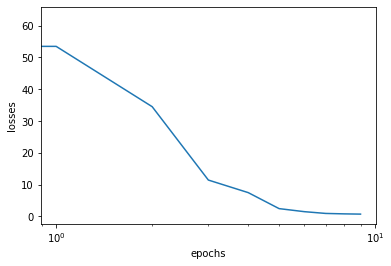

In [41]:
# plotting training losses over time
losses = NN.ylosses
array_losses = np.array(losses).ravel()
plt.semilogx(array_losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

In [23]:
# code drawn from:
# https://colab.research.google.com/github/chokkan/deeplearningclass/blob/master/mnist.ipynb#scrollTo=mZtrUqeSROVa

# implementing stochastic gradient descent
input = 20 # input data dimension
output = 10 # output dimension (i.e., number of labels)
hiddensizes = [100] # size of hidden layer
sizes = [input] + hiddensizes + [output]

weights = np.random.randn(sizes[-1],sizes[0]) # randomly initialized weights
eta = 0.005 # step size when performing gradient descent
accuracy_train = list()
accuracy_test = list()

for epoch in range(10): # running stochastic gradient descent for indicated number of epochs
    num_correct_train = 0
    for x, y in zip(x_train_pca, y_lto_train): # calculating stochastic gradient descent
        y_pred = softmax(np.dot(weights, x)) # label prediction
        weights += np.outer(eta * (y - y_pred), x) # updating weights according to step size conditional on label prediction correctness
        if  np.argmax(y_pred) == np.argmax(y): # recording number of correct predictions
            num_correct_train += 1      
    accuracy_train.append(float(num_correct_train) / len(y_lto_train)) # recording training accuracy
    num_correct_test = 0
    for x, y in zip(x_test_pca, y_test): # evaluating and storing the accuracy on the test set
        y_pred = np.argmax(np.dot(weights, x)) # predicting labels
        if y_pred == y:
            num_correct_test += 1 # recording number of correct predictions
    accuracy_test.append(float(num_correct_test) / len(y_test)) # recording test accuracy 

print('Test accuracy: {:.4f}, Training accuracy: {:.4f}'.format(float(num_correct_test) / len(y_test), 
                                                                float(num_correct_train) / len(y_lto_train)))

Test accuracy: 0.8671, Training accuracy: 0.8622


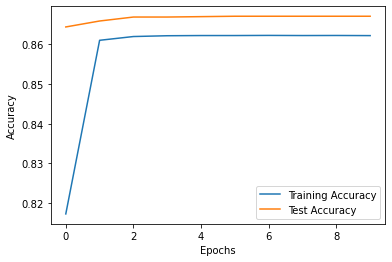

In [24]:
# plotting accuracy of stochastic gradient descent over epochs
plt.plot(accuracy_train,label="Training Accuracy")
plt.plot(accuracy_test,label="Test Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# (4) c)

In [28]:
# code drawn from:
# https://medium.com/@mail.rishabh.anand/you-should-start-using-keras-4a907fb32143
# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

n_classes = 10 # output dimension
epochs = 50 # number of epochs
batch_size = 128

model_keras = Sequential() # sequentially defining the neural network involved
model_keras.add(Dense(units=1200, activation='relu', input_dim=784)) # adding a dense layer 
model_keras.add(Dropout(0.2)) # adding a dropout rate
model_keras.add(Dense(units=1200, activation='relu')) # adding a dense layer
model_keras.add(Dropout(0.2)) # adding a dropout rate
model_keras.add(Dense(units=n_classes, activation='softmax')) # defining output layer (softmax to normalize multiclass prediction)
model_keras.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_keras.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1200)              1441200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                12010     
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model_keras.fit(normalised_features, 
                     y_lto_train, 
                     validation_data=(normalised_features_test, y_lto_test), 
                     batch_size=batch_size, epochs=epochs) # training the neural network

Epoch 1/50
469/469 [==============================] - 8s 16ms/step - loss: 0.2840 - accuracy: 0.9163 - val_loss: 0.1186 - val_accuracy: 0.9632
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1015 - accuracy: 0.9690 - val_loss: 0.0958 - val_accuracy: 0.9695
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0688 - accuracy: 0.9780 - val_loss: 0.0680 - val_accuracy: 0.9779
Epoch 4/50
469/469 [==============================] - 9s 20ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 5/50
469/469 [==============================] - 10s 21ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0690 - val_accuracy: 0.9795
Epoch 6/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0644 - val_accuracy: 0.9799
Epoch 7/50
469/469 [==============================] - 10s 21ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0638 - val_accuracy: 0.9

In [30]:
tacc,vacc = history.history['accuracy'], history.history['val_accuracy'] # recording accuacy values over epochs

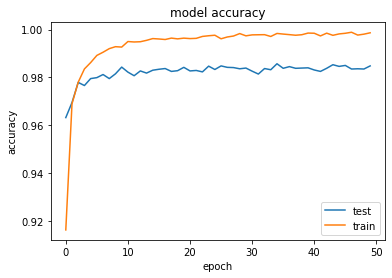

Training error:  0.9986 
Test error:  0.9848


In [31]:
# plotting accuracy over number of epochs
plt.plot(vacc,label='test')
plt.plot(tacc,label='train')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

print(f"Training error: ", round(tacc[-1],4),"\nTest error: ", round(vacc[-1],4))

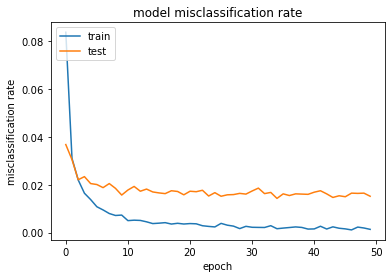

Training error:  0.0014 
Test error:  0.0152


In [32]:
# plotting errors over number of epochs
plt.plot(1.0-np.expand_dims(tacc,axis=1))
plt.plot(1.0-np.expand_dims(vacc,axis=1))
plt.title('model misclassification rate')
plt.ylabel('misclassification rate')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(f"Training error: ", round(1.0-np.expand_dims(tacc,axis=1)[-1][0],4),"\nTest error: ", round(1.0-np.expand_dims(vacc,axis=1)[-1][0],4))